# 概率

### 1. 基本概率论

In [49]:
%matplotlib inline
import torch
from torch.distributions import multinomial
import d2l.torch as d2l


In [50]:
fair_probs = torch.ones(6,dtype=torch.float32) / 6
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。 如果用Python的for循环来完成这个任务，速度会慢得惊人。 因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

In [51]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000    # 相对频率作为估计值

tensor([0.1670, 0.1680, 0.1650, 0.1610, 0.1720, 0.1670])

我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本。

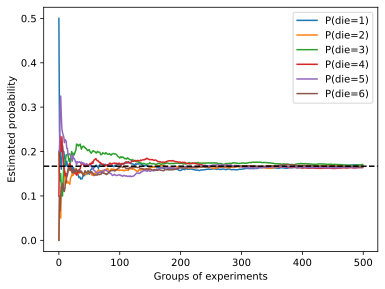

In [59]:
counts = multinomial.Multinomial(10,fair_probs).sample([500])
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),label=("P(die=" + str(i + 1) + ")"))    #缺省x
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();